## 1.1 머신러닝

In [1]:
# 문제에 따라 예측, 분류, 군집 알고리즘 등으로 분류

## 1.2 지도 학습 vs 비지도 학습

In [3]:
# 지도 학습: 정답 데이터를 다른 데이터와 함께 컴퓨터 알고리즘에 입력하는 방식
# 비지도 학습: 정답 데이터 없이 컴퓨터 알고리즘 스스로 데이터로부터 숨은 패턴을 찾아내는 방식

## 1.3 머신러닝 프로세스

In [5]:
# 분석 대상에 관해 수집한 관측값을 속성을 기준으로 정리한다.
# 데이터 정리>>데이터 분리(훈련/검증)>>알고리즘 준비>>모형 학습(훈련 데이터)>>예측(검증 데이터)>>모형 평가>>모형 활용

## 2 회귀 분석

 ## 2.1 단순 회귀 분석

In [7]:
# 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘-대표적인 지도학습 유형

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv('../data/part7/auto-mpg.csv', header=None)

#열 이름 지정
df.columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']

print(df.head())
print('\n')

# 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 10)
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0  

In [13]:
print(df.info())
print('\n')

#데이터 통계 요약 정보 확인
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000 

In [14]:
#horsepower 열의 자료형 변경(문자>>숫자)
print(df['horsepower'].unique()) #고유값 확인
print('\n')

df['horsepower'].replace('?', np.nan, inplace=True) #?을 np.nan으로 변경
df.dropna(subset=['horsepower'],axis=0,inplace=True) #누락 데이터 행 삭제
df['horsepower']=df['horsepower'].astype('float') #문자형을 실수형으로 변환

print(df.describe())

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']


              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1

In [15]:
# 분석에 활용할 열 선택
ndf=df[['mpg', 'cylinders', 'horsepower','weight']]
print(ndf.head())

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0


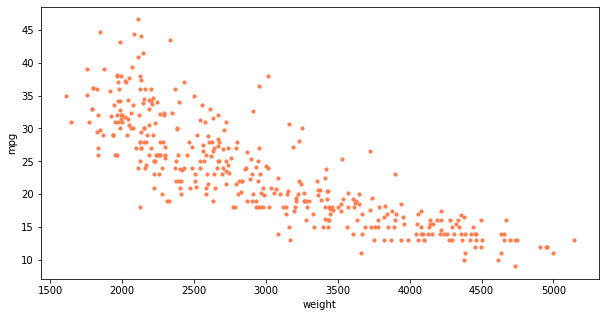

In [16]:
#Matplotlib으로 산점도 그리기
ndf.plot(kind='scatter', x='weight',y='mpg', c='coral', s=10, figsize=(10,5))
plt.show()
plt.close()

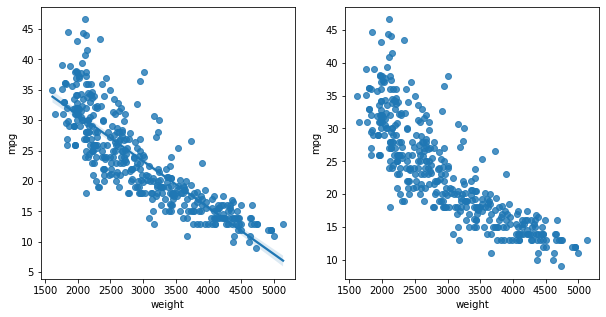

In [17]:
#seaborn으로 산점도 그리기
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1) #회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False) #회귀선 미표시
plt.show()
plt.close()

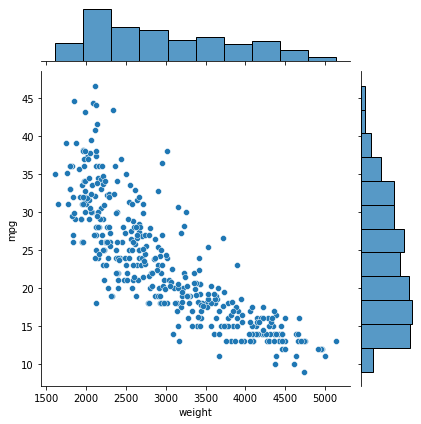

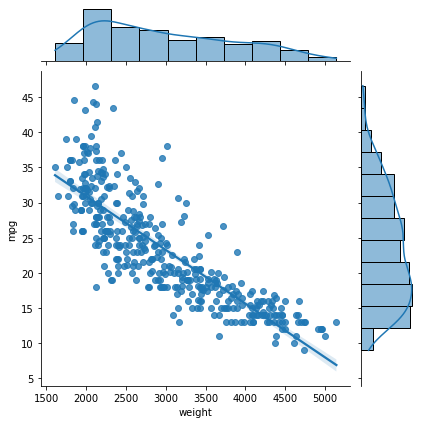

In [18]:
#seaborn 조인트 그래프-산점도, 히스토그램
sns.jointplot(x='weight', y='mpg', data=ndf) #회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf) #회귀선 표시
plt.show()
plt.close()

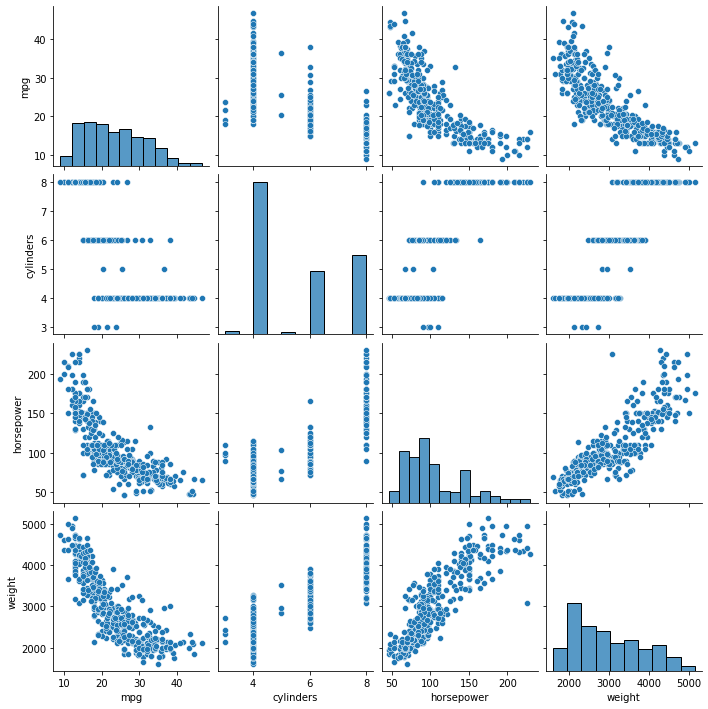

In [19]:
# seaborn pairplot-모든 경우의 수 그리기
grid_ndf=sns.pairplot(ndf)
plt.show()
plt.close()

In [20]:
# 훈련/검증 데이터 분할

#데이터 셋 구분
X=ndf[['weight']] #독립변수
y=ndf['mpg'] #종속변수

#train data와 test data로 구분
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=10) # 검증 30%, 랜덤추출값

print('train data 개수:', len(X_train))
print('test data 개수:', len(X_test))


train data 개수: 274
test data 개수: 118


In [21]:
#sklearn 선형 회귀 모듈
from sklearn.linear_model import LinearRegression

#단순회귀분석 모형 객체 생성
lr=LinearRegression()

#train data 를 가지고 모형 학습
lr.fit(X_train,y_train)

#학습을 마친 모형에 test data 를 적용하여 결정계수(R-제곱)
r_square=lr.score(X_test, y_test)
print(r_square)

0.6822458558299325


In [22]:
#회귀식 기울기
print('기울기 a:', lr.coef_)
print('\n')

#회귀식 y 절편
print('y절편 b', lr.intercept_)

기울기 a: [-0.00775343]


y절편 b 46.7103662572801


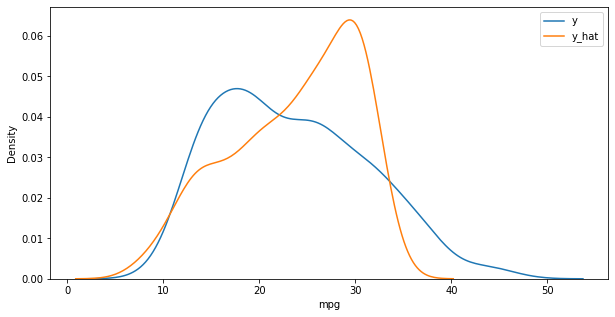

In [23]:
y_hat=lr.predict(X)

plt.figure(figsize=(10,5))
ax1=sns.kdeplot(y, label="y")
ax2=sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()